- pre pruning
- post pruning
- feature selection
- EDA
- up sampling

achieved the best test cls score: 95% with decision tree

In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column}': {unique_values}")

customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender': ['Female' 'Male']
SeniorCitizen': [0 1]
Partner': ['Yes' 'No']
Dependents': ['No' 'Yes']
tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService': ['No' 'Yes']
MultipleLines': ['No phone service' 'No' 'Yes']
InternetService': ['DSL' 'Fiber optic' 'No']
OnlineSecurity': ['No' 'Yes' 'No internet service']
OnlineBackup': ['Yes' 'No' 'No internet service']
DeviceProtection': ['No' 'Yes' 'No internet service']
TechSupport': ['No' 'Yes' 'No internet service']
StreamingTV': ['No' 'Yes' 'No internet service']
StreamingMovies': ['No' 'Yes' 'No internet service']
Contract': ['Month-to-month' 'One year' 'Two year']
PaperlessBilling': ['Yes' 'No']
PaymentMethod': ['Electronic check' 'Mailed check' 'Bank tr

Text(0, 0.5, 'Churn')

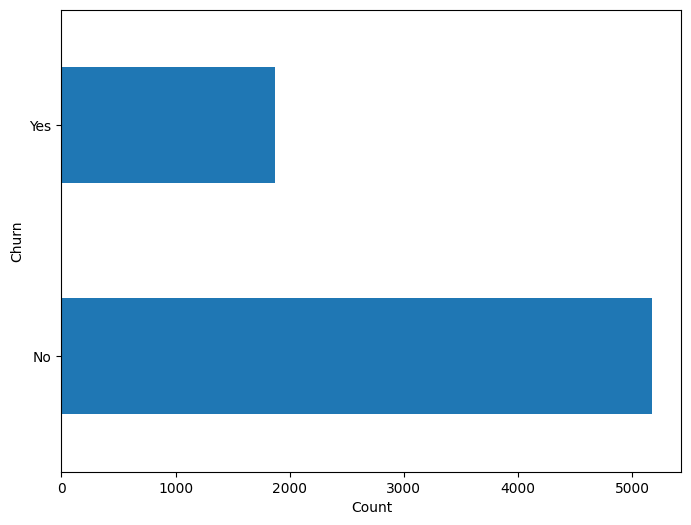

In [5]:
data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count')
plt.ylabel('Churn')
# in-balanced data

In [6]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', pd.NA)

In [7]:
data['TotalCharges'].isna().sum()

11

In [8]:
# Replace non-numeric values with NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [9]:
mean_value = data['TotalCharges'].mean()
mean_value

2283.3004408418656

In [10]:
data['TotalCharges'] = data['TotalCharges'].fillna(mean_value)

In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
data = data.drop(['customerID'], axis=1)

In [13]:
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
non_numeric_cols = data.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [14]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
one_hot_encoded_cols = pd.DataFrame(one_hot_encoder.fit_transform(data[non_numeric_cols]),
                                    columns=one_hot_encoder.get_feature_names_out(non_numeric_cols))
data = pd.concat([data, one_hot_encoded_cols], axis=1)
data = data.drop(non_numeric_cols, axis=1)
data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0,72,103.20,7362.90,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0,11,29.60,346.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1,4,74.40,306.60,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [15]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

<Axes: >

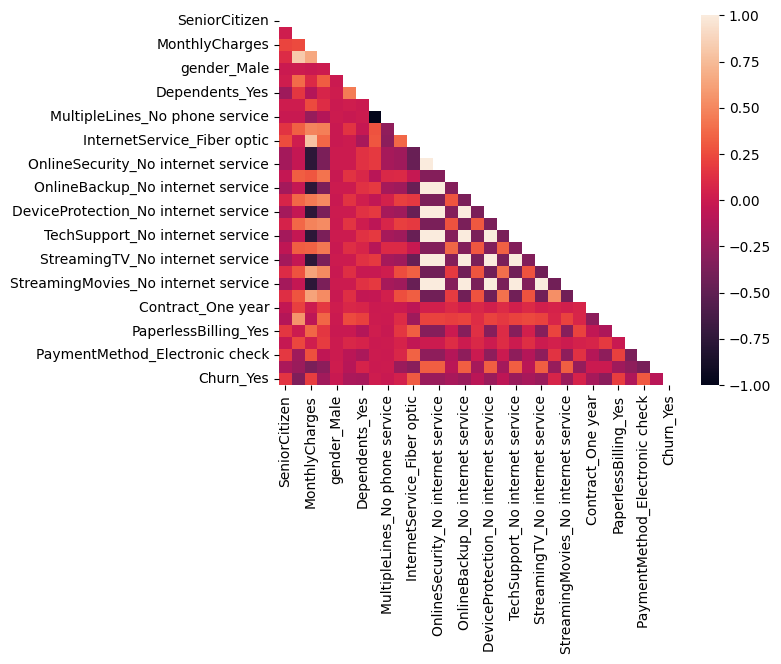

In [16]:
corr = data.corr()
sns.heatmap((corr), mask=np.triu(corr))

In [17]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.504756,0.483033,0.299588,0.903166,0.096834,0.421837,...,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.500013,0.499748,0.458110,0.295752,0.295752,0.493888,...,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:30]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
pd.DataFrame(scaled_X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,...,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5.634000e+03,5634.000000
mean,3.783508e-17,8.355246e-17,-6.129282e-16,-1.002630e-16,4.792443e-17,-3.215981e-17,-1.450345e-17,5.044677e-17,4.918560e-17,-2.900689e-17,...,-7.314781e-17,1.210722e-16,-7.314781e-17,-1.576462e-17,-1.891754e-17,-1.210722e-16,-6.368905e-17,1.008935e-17,1.261169e-17,0.000000
std,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,...,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089
min,-4.377492e-01,-1.325551e+00,-1.549333e+00,-1.005042e+00,-1.025166e+00,-9.695786e-01,-6.526623e-01,-3.034225e+00,-3.295734e-01,-8.605234e-01,...,-5.240808e-01,-7.947482e-01,-5.240808e-01,-7.995125e-01,-5.235304e-01,-5.583528e-01,-1.200007e+00,-5.276558e-01,-7.096498e-01,-0.542750
25%,-4.377492e-01,-9.570361e-01,-9.676800e-01,-8.310381e-01,-1.025166e+00,-9.695786e-01,-6.526623e-01,3.295734e-01,-3.295734e-01,-8.605234e-01,...,-5.240808e-01,-7.947482e-01,-5.240808e-01,-7.995125e-01,-5.235304e-01,-5.583528e-01,-1.200007e+00,-5.276558e-01,-7.096498e-01,-0.542750
50%,-4.377492e-01,-1.381148e-01,1.881481e-01,-3.884735e-01,9.754521e-01,-9.695786e-01,-6.526623e-01,3.295734e-01,-3.295734e-01,-8.605234e-01,...,-5.240808e-01,-7.947482e-01,-5.240808e-01,-7.995125e-01,-5.235304e-01,-5.583528e-01,8.333283e-01,-5.276558e-01,-7.096498e-01,-0.542750
75%,-4.377492e-01,9.264829e-01,8.333678e-01,6.702836e-01,9.754521e-01,1.031376e+00,1.532186e+00,3.295734e-01,-3.295734e-01,1.162083e+00,...,-5.240808e-01,1.258260e+00,-5.240808e-01,1.250762e+00,-5.235304e-01,-5.583528e-01,8.333283e-01,-5.276558e-01,1.409146e+00,-0.542750
max,2.284413e+00,1.622566e+00,1.786033e+00,2.827875e+00,9.754521e-01,1.031376e+00,1.532186e+00,3.295734e-01,3.034225e+00,1.162083e+00,...,1.908103e+00,1.258260e+00,1.908103e+00,1.250762e+00,1.910109e+00,1.790982e+00,8.333283e-01,1.895175e+00,1.409146e+00,1.842470


In [20]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

In [21]:
clf.fit(scaled_X_train, y_train)

DecisionTreeClassifier()

In [22]:
# tree.plot_tree(clf)

In [23]:
pred = clf.predict(scaled_X_test)
pred

array([1., 0., 0., ..., 0., 0., 1.])

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(pred, y_test)

0.7012065294535131

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.7097232079489

In [27]:
clf = tree.DecisionTreeClassifier(max_depth=5, )
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.8062455642299503

In [74]:
# feature selection
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


rf = RandomForestClassifier(n_estimators=100, random_state=42)

X = data.iloc[:, 0:30]
y = data.iloc[:, -1]
rf.fit(X, y)

importances = rf.feature_importances_

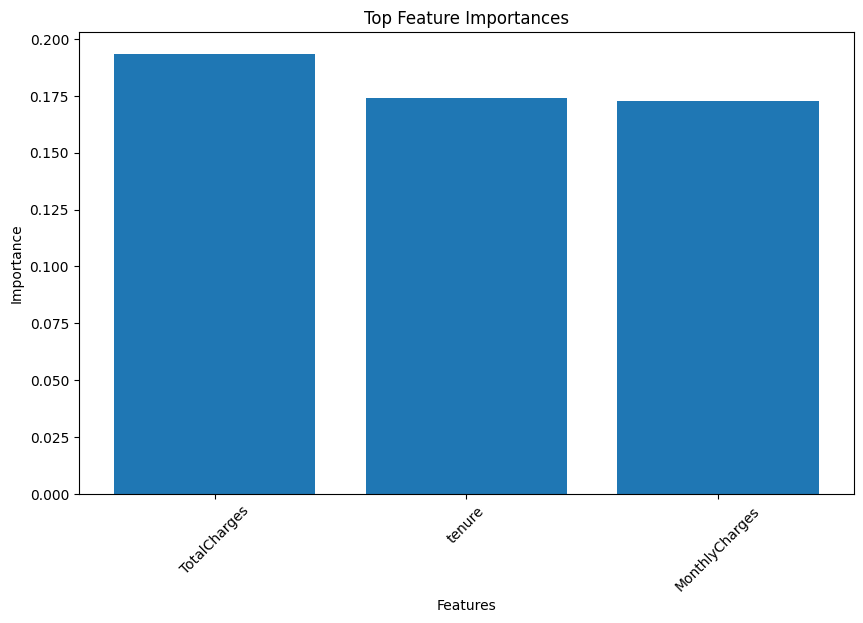

In [75]:
top_k = 3
indices = importances.argsort()[-top_k:][::-1]
feature_names = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances[indices])
plt.title('Top Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [76]:
keep = list(feature_names)

In [77]:
all = list(data.columns)
drop = list(set(all) - set(keep))

In [78]:
small_data = data.drop(drop, axis=1)
small_data.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [79]:
X = small_data.iloc[:, 0:top_k]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

In [80]:
X_train.head(1)

,tenure,MonthlyCharges,TotalCharges
2142,21,64.85,1336.8


In [81]:
y_train.head(1)

2142    0.0
Name: Churn_Yes, dtype: float64

In [82]:
clf = tree.DecisionTreeClassifier(max_depth=5, )
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.7906316536550745

In [83]:
# pre pruning
clf = tree.DecisionTreeClassifier(criterion = "gini",
                                  splitter = 'random',
                                  max_leaf_nodes = 10,
                                  min_samples_leaf = 5,
                                  max_depth= 5)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.7835344215755855

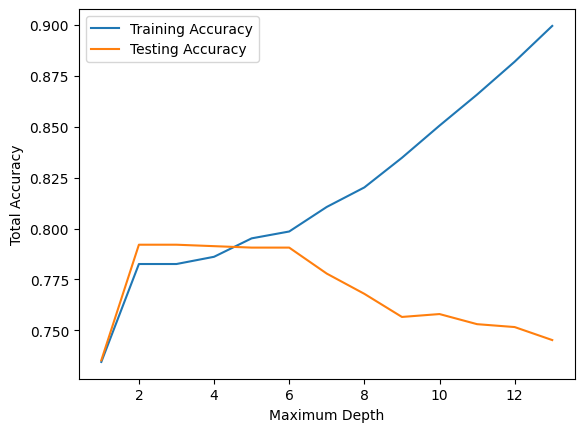

In [84]:
max_depth_list = [1,2,3,4,5,6,7,8,9,10,11,12,13]

train_acc = [] # Log training errors for each model
test_acc = [] # Log testing errors for each model

for x in max_depth_list:
    dtc = tree.DecisionTreeClassifier(max_depth=x)
    dtc.fit(X_train, y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_acc.append(accuracy_score(y_train, train_z))
    test_acc.append(accuracy_score(y_test, test_z))

x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
plt.plot(x, train_acc, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_acc, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

# overfitting

In [85]:
# feature selecton from 30 to 5 did not improve / degrade the accuracy

In [86]:
# up sampling
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

In [87]:
y.value_counts()

Churn_Yes
0.0    5174
1.0    1869
Name: count, dtype: int64

In [88]:
y_res.value_counts()

Churn_Yes
1.0    2803
0.0    2712
Name: count, dtype: int64

In [89]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res,test_size=0.2)

In [90]:
clf = tree.DecisionTreeClassifier(criterion = "gini",
                                  splitter = 'random',
                                  max_leaf_nodes = 10,
                                  min_samples_leaf = 5,
                                  max_depth= 5)
clf.fit(Xr_train, yr_train)
pred = clf.predict(Xr_test)
accuracy_score(pred, yr_test)

0.898458748866727

In [91]:
# upsampling improved model test accuracy from 80 to 90%

In [92]:
# post pruning
path = clf.cost_complexity_pruning_path(Xr_train, yr_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

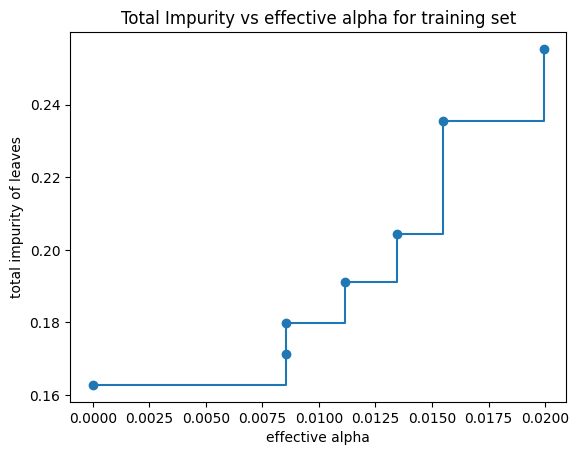

In [93]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [94]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(Xr_train, yr_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.1222394785095744


In [95]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.008524172336140029, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.008558308157383631, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011137353350645009, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.01344542373911091, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.015482509866536681, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.019934605388549055, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.1222394785095744, random_state=0)]

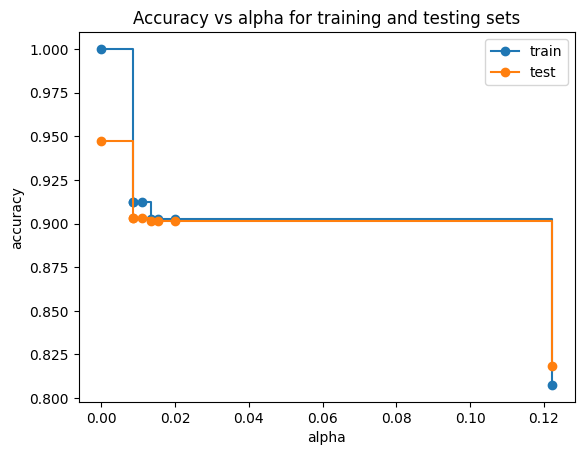

In [96]:
train_scores = [clf.score(Xr_train, yr_train) for clf in clfs]
test_scores = [clf.score(Xr_test, yr_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Text(0, 0.5, 'Accuracy scores')

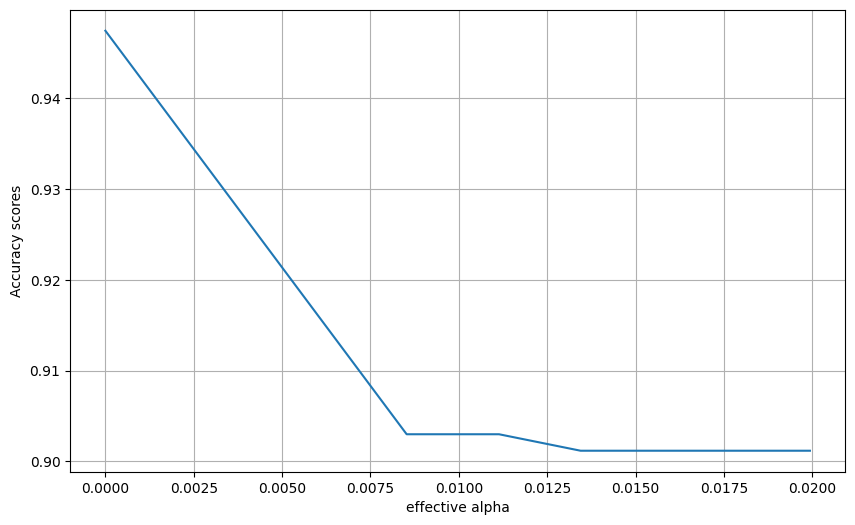

In [97]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(yr_test, clf.predict(Xr_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [98]:
clfs[0]

DecisionTreeClassifier(random_state=0)

In [99]:
# selecting the best model
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(Xr_train, yr_train)
pred = clf.predict(Xr_test)
accuracy_score(pred, yr_test)

0.9474161378059837

In [100]:
# test accuracy increased to 95% from 90% after trying post pruning

In [101]:
accuracy_score(clf.predict(Xr_train), yr_train)
# train accuracy is 100%

1.0

In [102]:
# instead of top 3/5 features, trying on all features

X = data.iloc[:, 0:30]
y = data.iloc[:, -1]

sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20,
                                                    random_state=42)


clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.9376623376623376

In [103]:
# not doing featue selection hurt the accuracy this time by 1%

In [105]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [107]:
data.drop('customerID', axis=1, inplace=True)

In [109]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [110]:
# different encoding technique

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
df_cat = data.select_dtypes(include=[object])
dd = ohe.fit_transform(data[df_cat.columns])
dd.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [111]:
df = pd.concat([data, dd], axis=1)

In [112]:
for i in df_cat.columns:
    df.drop([i], axis=1, inplace=True)

In [113]:
df.drop('Churn_No', axis=1, inplace=True)

In [114]:
df.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [119]:
df.dropna(inplace=True)

In [125]:
X = df.iloc[:, 0:45]
y = df.iloc[:, -1]

sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20,
                                                    random_state=42)


clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.9355670103092784

In [ ]:
# different encoding did not help

# achieved best test cls score: 95% with decision tree